![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from itertools import combinations

# Interpolação em pontos diferentes

Vamos continuar observando a interpolação de Lagrange.
Agora, vamos escolher pontos que não são uniformemente espaçados nos intervalos.

In [3]:
def lagrange_coefs(xs,ys):
    """ 
    Coeficientes (em ordem crescente) do polinômio interpolador dos pontos (x_i, y_i).
    """
    assert(len(xs) == len(ys))
    xs = np.array(xs)
    ys = np.array(ys)
    n = len(xs)
    M = np.zeros((n,n), dtype=float)
    for i in range(n):
        M[:,i] = xs**i
    return np.linalg.solve(M,ys)

def lagrange(xs,ys):
    """ 
    Retorna uma função que calcula polinômio interpolador de Lagrange dos pontos (x_i, y_i). 
    """
    n = len(xs)
    C = lagrange_coefs(xs,ys)
    def poli(x):
        soma = 0
        for i in range(n):
            soma+=C[i]*x**i
        return soma
    return poli

# Parte 1: Escolhendo três pontos para interpolar

Vamos usar 11 pontos no intervalo $[-1,1]$, e ver qual escolha de pontos dá o menor erro de interpolação.

## Questão 1: Medindo o máximo do erro

Para observar o erro entre $f$ e o (um) polinômio interpolador $P_f$, precisamos de uma função para medir o erro.
Vamos usar o máximo do erro no intervalo $[a,b]$.
Aqui, novamente, vamos usar os "pontos médios" de uma subdivisão,
para evitar privilegiar os extremos do intervalo.

In [4]:
def maxerr(f, P, a, b, n=100):
    l, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    mids= l + h/2
    d = [abs(f(i)-P(i)) for i in mids]
    return max(d)

In [5]:
assert maxerr(np.sin, np.cos, 0, np.pi) > 1.41

In [6]:
assert maxerr(np.sin, np.cos, 16, 17, n=300) < 0.7

## Questão 2: Variando os pontos

Considere os 11 pontos abaixo.
Para todas as $\binom{11}{3} = 165$ escolhas possíveis de 3 pontos,
calcule o máximo do erro de interpolação (no intervalo $[-1,1]$)
entre o polinômio e a função `np.exp`.

In [7]:
ts = np.linspace(-1,1,11)
errs_max = []


for xs in combinations(ts, 3):
    interpol = lagrange(xs, np.exp(xs))
    errs_max+=[maxerr(np.exp, interpol, -1, 1)]

Abaixo, vamos ver como ficam os erros, tanto em escala natural como em escala log.

In [8]:
def histogramas(errs):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
    ax1.hist(errs, bins=20)
    ax2.hist(np.log2(errs), bins=20)

    ax1.set_title("Distribuição dos erros")
    ax1.set_xlabel("Erro")
    ax2.set_title("Distribuição dos erros")
    ax2.set_xlabel("Log em base 2 do erro")

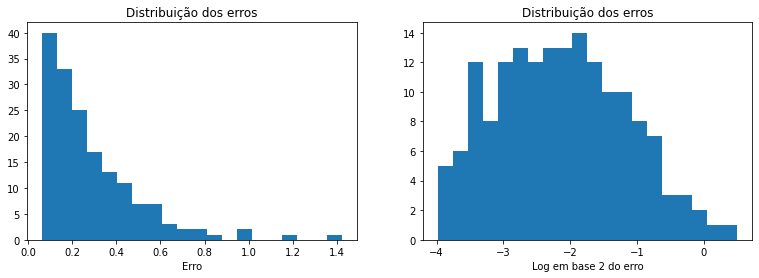

In [9]:
histogramas(errs_max)

O que você percebe quanto à distribuição dos erros?

Percebemos que a distribuição é altamente assimétrica e positiva, com a maioria das observações concentradas em valores menores de erro, porém que não parece ter uma cauda longa (o maior erro, 1.4, está na mesma ordem de grandeza dos demais). Na escala log, ela aparente se comportar como uma distribuição normal levemente assimétrica (com o lado esquerdo maior) e centrada em -2.

Qual a combinação de pontos teve o maior erro? E qual teve o menor erro?

Dica: Você pode usar as funções `np.argmax()`, `np.argmin()`.

In [10]:
c = list(combinations(ts, 3))
maxi = c[np.argmax(errs_max)]
print("Maximo: ",maxi)

Maximo:  (0.6000000000000001, 0.8, 1.0)


In [11]:
mini = c[np.argmin(errs_max)]
print("Mínimo: ",mini)

Mínimo:  (-0.8, 0.20000000000000018, 0.8)


Faça o gráfico dos dois polinômios interpoladores correspondentes,
sobrepostos ao gráfico da função exponencial.

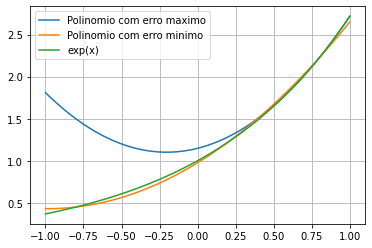

In [12]:
maxf = lagrange(maxi, np.exp(maxi))
minf = lagrange(mini, np.exp(mini))
X = np.linspace(-1, 1)
plt.plot(X, maxf(X), label='Polinomio com erro maximo')
plt.plot(X, minf(X), label ='Polinomio com erro minimo')
plt.plot(X, np.exp(X), label = 'exp(x)')
plt.grid()
plt.legend()
ax = plt.gca()

In [13]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

Comente, por exemplo:
- O comportamento destas curvas é esperado, dados os pontos usados para interpolação?
- Quão grandes estão os erros?

Sim, o comportamento é conforme o esperado. Vendo o fitting da curva de erro máximo, percebe-se que a escolha de três pontos próximos entre si não produziu um fitting muito bom. Isso porque a introdução de pontos muito próximos entre si não nos permite obter um comportamento mais abrangente da função que os gerou, dado que os pontos próximos podem ser facilmente aproximados por uma reta se usarmos a expansão de Taylor até a primeira ordem. Colocando os pontos mais espaçados, tal como no caso do polinômio de menor erro, permite que extrapolemos um pouco mais a respeito do comportamento da função fora do intervalo [0.6,1]. Os erros (calculados como distância para a função exponencial) podem ser vistos no gráfico abaixo:

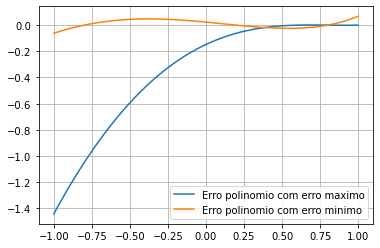

In [14]:
plt.plot(X, np.exp(X)-maxf(X), label='Erro polinomio com erro maximo')
plt.plot(X, -minf(X)+np.exp(X), label ='Erro polinomio com erro minimo')
plt.grid()
plt.legend();

## Questão 3: Pontos uniformemente espaçados

Para comparar com o polinômio obtido por pontos igualmente espaçados,
modifique a função `histogramas` para receber outro argumento,
e traçar uma linha vertical na posição correspondente
(nos dois eixos!).

In [15]:
def histogramas(errs, y_destaque):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
    ax1.hist(errs, bins=20)
    ax2.hist(np.log2(errs), bins=20)

    ax1.set_title("Distribuição dos erros")
    ax1.set_xlabel("Erro")
    ax1.axvline(y_destaque,color='r',label="uniforme")
    ax1.legend()
    ax2.set_title("Distribuição dos erros")
    ax2.set_xlabel("Log em base 2 do erro")
    ax2.axvline(np.log2(y_destaque),color='r',label="uniforme")
    ax2.legend()

Agora, calcule o erro máximo cometido pelo polinômio interpolador com 3 pontos igualmente espaçados em $[-1,1]$:

In [16]:
# Dê sua resposta da forma
err_unif = 0
xs = np.linspace(-1,1,num=3)
xs = np.array([-0.8,0.2,0.8])
interpol = lagrange(xs, np.exp(xs))
err_unif=maxerr(np.exp, interpol, -1, 1)

In [17]:
err_unif

0.06314544254805599

In [18]:
np.log2(err_unif)

-3.9851775769113056

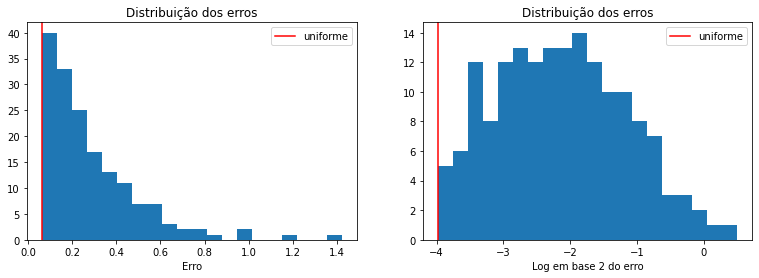

In [19]:
histogramas(errs_max, err_unif)

Comente.

Nota-se que o erro para os pontos uniformes deu bem próximo do caso ótimo. Enquanto no caso ótimo tivemos um erro máximo de 0.0631454425, no caso uniforme tivemos 0.0785216335. Na escala log, esses valores são, respectivamente, -3.9851775769 e -3.6707660029. Notamos, portanto, que nem valores muito próximos entre si, nem os igualmente espaçados, produziram o resultado ótimo.

## Questão 4: Mais pontos!

Agora, repita o estudo anterior para 31 pontos uniformemente espaçados em $[-1,1]$.

In [20]:
def all_errs(f, n, pts, errfun):
    """Retorna todos os erros dos polinômios interpoladores para a função  f,
    gerados pela escolha de  n  pontos da lista/array  pts.

    A função  errfun  recebe duas funções  f e g  e retorna o erro entre elas."""
    x = combinations(pts, n)
    errs_max = []
    for xs in x:
        interpol = lagrange(xs, f(xs))
        errs_max+=[errfun(f, interpol)]
    return errs_max

In [21]:
def aux_maxerr(f, g):
    return maxerr(f, g, -1, 1, n=200)

errs31 = all_errs(np.exp, 3, np.linspace(-1,1,31), aux_maxerr)
assert len(errs31) == 31*30*29//6

In [22]:
assert np.abs(min(errs31) - 0.05) < 1e-3
assert 1.9 < max(errs31) < 2.0

Vejamos os histogramas dos erros:

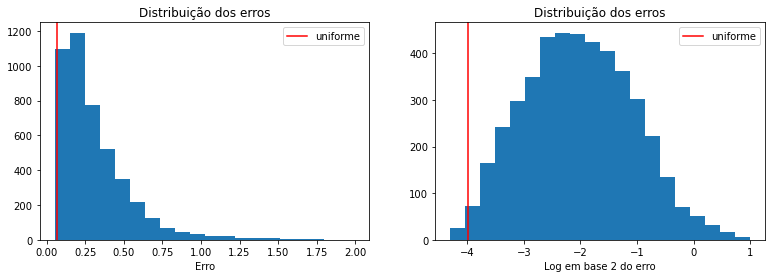

In [23]:
histogramas(errs31, err_unif)

O que você observa, em comparação com o caso inicial com apenas 11 pontos?

Considerando mais pontos temos que o histograma se aproxima mais do formato da distribuição que esperávamos: em escala log dá para visualizar melhor a distribuição normal e na distribuição original alguns buracos são preenchidos. Além disso, a linha vertical está levemente mais distante do ponto extremo esquerdo, de menor erro.

Calcule o melhor e pior polinômios:

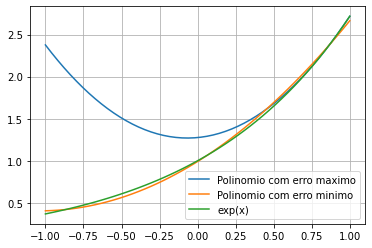

In [24]:
ts = np.linspace(-1,1,31)
c = list(combinations(ts, 3))
maxi = c[np.argmax(errs31)]
mini = c[np.argmin(errs31)]
maxf = lagrange(maxi, np.exp(maxi))
minf = lagrange(mini, np.exp(mini))
X = np.linspace(-1, 1)
plt.plot(X, maxf(X), label='Polinomio com erro maximo')
plt.plot(X, minf(X), label ='Polinomio com erro minimo')
plt.plot(X, np.exp(X), label = 'exp(x)')
plt.grid()
plt.legend()
ax = plt.gca()

In [25]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

In [26]:
def error_npts(pts,f,g):
    return f(pts) - g(pts)

Faça, agora, o gráfico do erro para os dois polinômios.

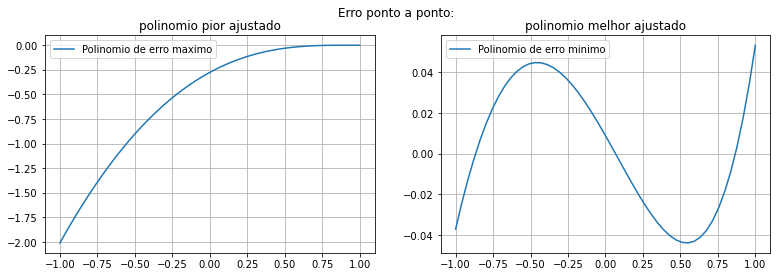

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
ax1.plot(X,error_npts(X,np.exp,maxf),label="Polinomio de erro maximo")
ax1.legend()
ax2.plot(X,error_npts(X,np.exp,minf),label="Polinomio de erro minimo")
ax2.legend()
ax1.grid()
ax2.grid()
fig.suptitle("Erro ponto a ponto:")
ax1.set_title("polinomio pior ajustado")
ax2.set_title("polinomio melhor ajustado");

In [28]:
for ax in (ax1, ax2):
    assert len(ax.lines) == 1
    assert ax.get_title() != ""

## Questão 5: Outras funções

Repita a análise com 31 pontos (ou mais, se seu código e computador forem rápidos o suficiente!)
para as seguintes funções:

- cosseno, em $[-1,1]$
- log, em $[2,10]$,
- $\frac{1}{1 + x^2}$ em $[-1,1]$

Para evitar repetir muito código, crie uma função `analise` para fazer as contas e os gráficos!

In [29]:
def analise(f, a, b, deg, npts, nfine):
    """Análise de erro de interpolação da função  f, no intervalo  [a,b], com polinômios de grau  deg.
    Usa  npts  pontos igualmente espaçados para escolher os nós de interpolação,
    e  nfine  pontos para calcular erros / fazer gráficos.
    
    Faz
    - os histogramas dos erros
    - gráficos dos erros do melhor / pior polinômio
    E retorna os pontos correspondentes à melhor / pior interpolação."""
    assert npts > deg
    tfine = np.linspace(a,b,nfine)

    def nfineerror(f,g,nf=nfine):
        return maxerr(f, g, a, b, n=nf)
    xs = np.linspace(a,b,num=npts)
    err = all_errs(f, deg+1, xs, nfineerror)
    
    
    
    
    c = list(combinations(xs, deg+1))
    maxi = c[np.argmax(err)]
    mini = c[np.argmin(err)]
    print(f'Pontos que geram erro máximo:{maxi} \nPontos que geram erro mínimo:{mini}')
    maxf = lagrange(maxi, f(maxi))
    minf = lagrange(mini, f(mini))
    
    histogramas(err,maxerr(f, minf, a, b))
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
    ax1.plot(tfine, error_npts(tfine,f,maxf),label="Polinomio de erro maximo")
    ax1.legend()
    ax2.plot(tfine,error_npts(tfine,f,minf),label="Polinomio de erro minimo")
    ax2.legend()
    ax1.grid()
    ax2.grid()
    fig.suptitle("Erro ponto a ponto:")
    ax1.set_title("polinomio pior ajustado")
    ax2.set_title("polinomio melhor ajustado")
    
    #return (maxi, mini)

Pontos que geram erro máximo:(0.8666666666666667, 0.9333333333333333, 1.0) 
Pontos que geram erro mínimo:(-0.8666666666666667, 0.06666666666666665, 0.8666666666666667)


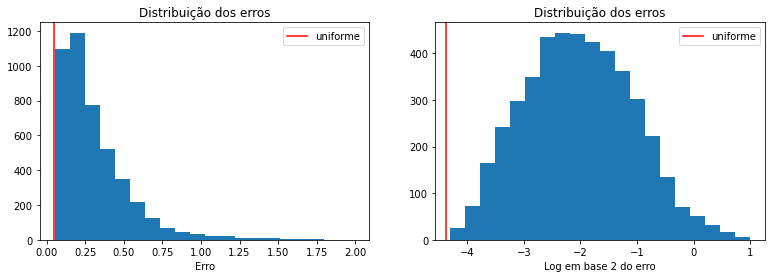

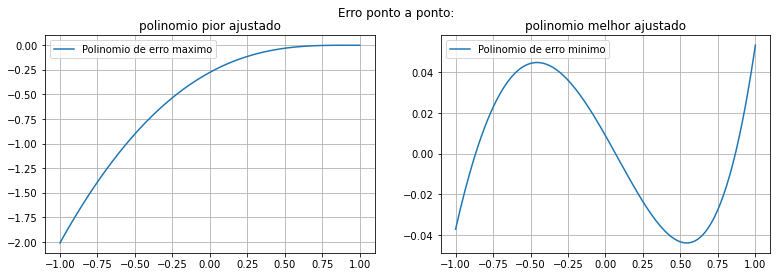

In [30]:
# Verifique que está dando certo!
analise(np.exp, -1, 1, 2, 31, 200)

Pontos que geram erro máximo:(-1.0, -0.9333333333333333, -0.8666666666666667) 
Pontos que geram erro mínimo:(-0.9333333333333333, -0.4, 0.3999999999999999)


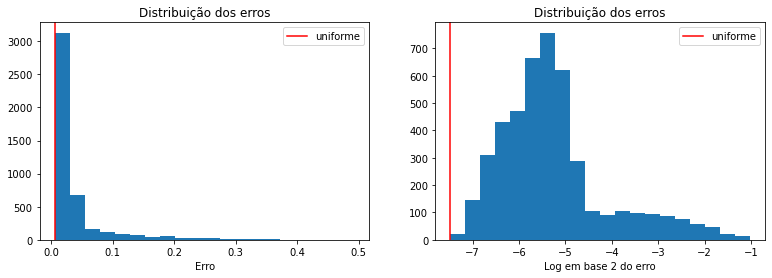

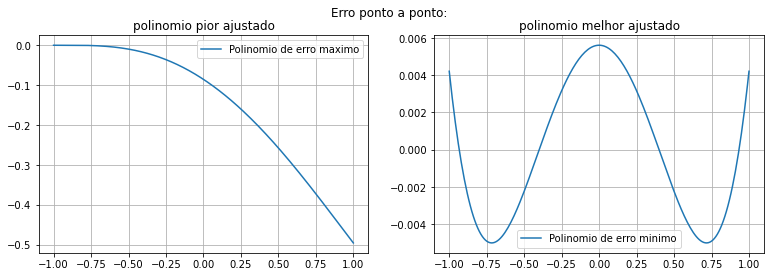

In [31]:
analise(np.cos, -1, 1, 2, 31, 200)

Pontos que geram erro máximo:(2.0, 2.2666666666666666, 2.533333333333333) 
Pontos que geram erro mínimo:(2.2666666666666666, 5.2, 9.2)


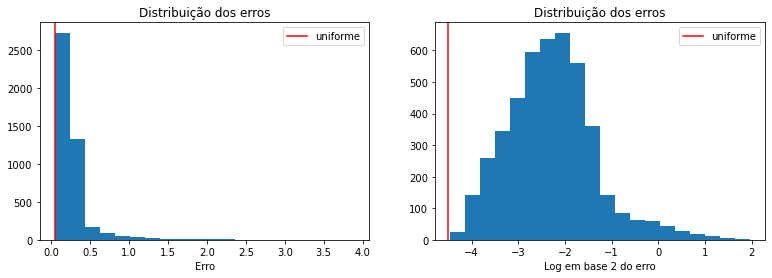

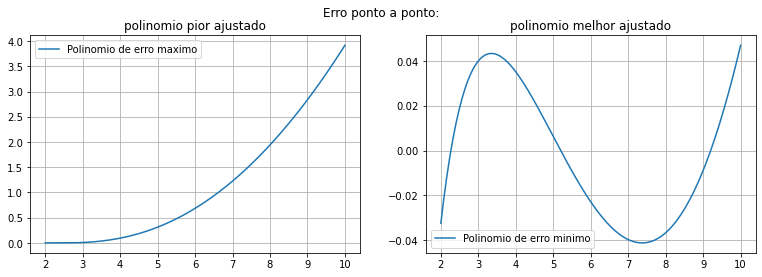

In [32]:
analise(np.log, 2, 10, 2, 31, 200)

In [33]:
def cauchy(x):
    x = np.asarray(x)
    return 1/(1 + x**2)

Pontos que geram erro máximo:(0.8666666666666667, 0.9333333333333333, 1.0) 
Pontos que geram erro mínimo:(-0.9333333333333333, -0.33333333333333337, 0.33333333333333326)


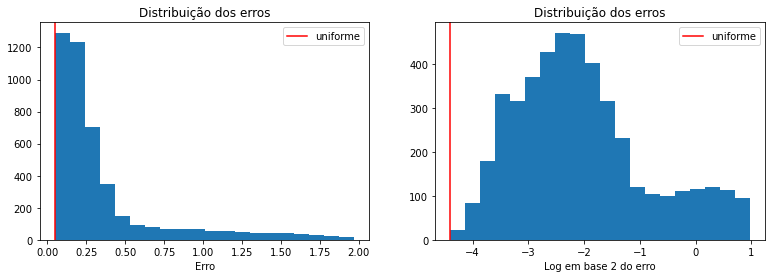

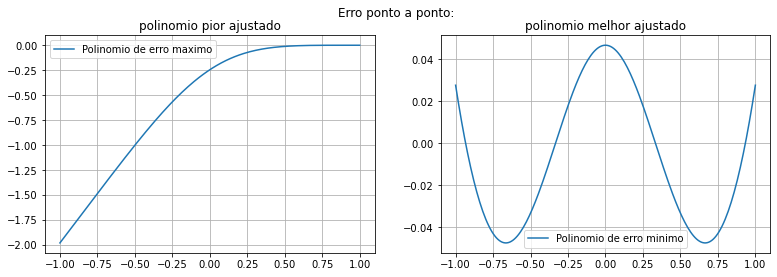

In [34]:
analise(cauchy, -1, 1, 2, 31, 200)

Comente:
- como ficaram as distribuições dos erros
- como ficam as curvas de erro para o melhor / pior caso
    - se isso faz sentido

Em relação a distribuição dos erros, é possível observar a tendência de muitas combinações levando a erros grandes e, quanto menor o erro, menos combinações. As curvas de erro do pior caso apresentam um erro pequeno em uma parte, mas rapidamente cresce para fora da região, enquanto o do melhor caso apresentam o erro mais distribuído e com menor amplitude. Ambos os fatos se dão por conta de que pontos mal posicionados, como por exemplo, muito próximos, acabam fazendo uma boa aproximação local, mas não geral, enquanto pontos mais espalhados tendem a ter um erro mais oscilatório, mas com uma aproximação melhor no geral.

Agora, comente:
- quais foram os pontos escolhidos para melhor / pior caso
- e novamente se isso faz sentido.

Como citado na caixa anterior, os pontos de pior caso estão relativamente perto e os de melhor caso já estão razoavelmente separáveis. Além disso, em todos os casos os pontos que levam ao pior ajuste estão igualmente espaçados, o que não ocorre no melhor ajuste. Isso nós diz que, nesses pontos do melhor, partes diferentes da função estão sendo aproximadas, ao invés de só um trecho de forma local, assim ajustando a função melhor como um todo.

Outro ponto interessante, relativo às funções estudadas acima, é a semelhança no formato dos gráficos para o coseno e para a função cauchy. De fato, ambas são funções pares, o que pode estar relacionado com o comportamento simétrico do erro no polinômio de melhor interpolação. As funções log e exponencial, por outro lado, não possuem tal simetria. Contudo, uma função é o inverso da outra, o que pode explicar a aparência oposta nos gráficos do pior polinomio interpolador.

Abaixo estão mais duas análises que corroboram o indicado acima (mais uma funcao par e a funcao exponencial no mesmo intervalo do log acima):

Pontos que geram erro máximo:(-1.0, -0.9333333333333333, -0.8666666666666667) 
Pontos que geram erro mínimo:(-0.9333333333333333, -0.4, 0.3999999999999999)


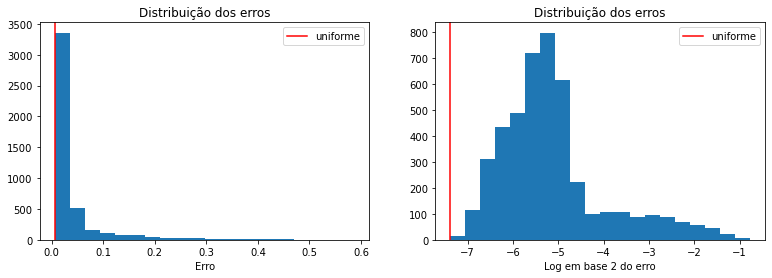

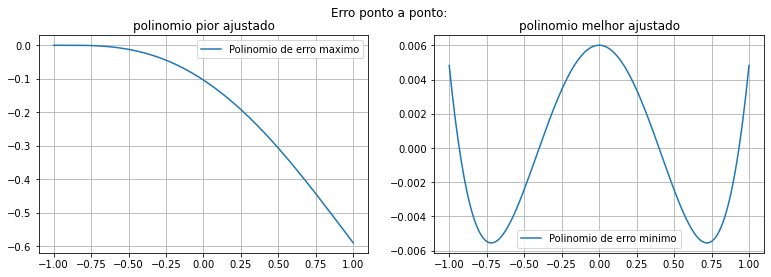

In [35]:
analise(np.cosh, -1, 1, 2, 31, 200)

Pontos que geram erro máximo:(9.466666666666667, 9.733333333333334, 10.0) 
Pontos que geram erro mínimo:(2.8, 7.066666666666666, 9.733333333333334)


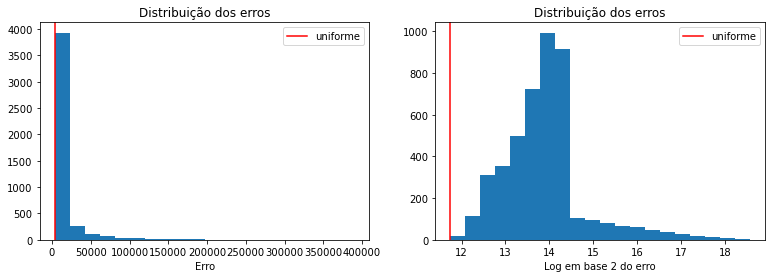

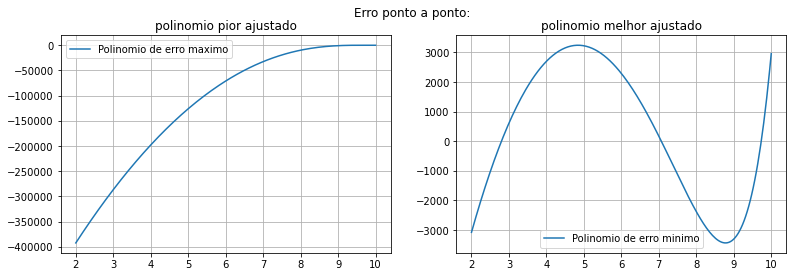

In [36]:
analise(np.exp, 2, 10, 2, 31, 200)

Abaixo outro exemplo de funcao par; nota-se que o gráfico está invertido em relaçao ao eixo horizontal dessa vez, o que só indica, na verdade, que seriam iguais se estivessemos tomando o valor absoluto do erro.

Pontos que geram erro máximo:(-1.0, -0.9333333333333333, -0.8666666666666667) 
Pontos que geram erro mínimo:(-0.9333333333333333, -0.4, 0.3999999999999999)


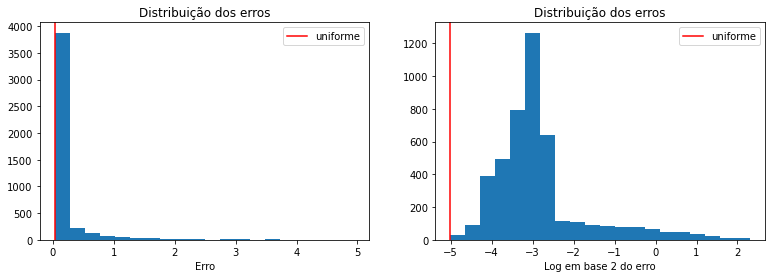

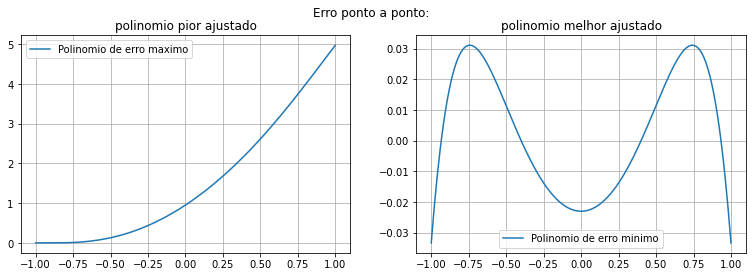

In [37]:
def s(x):
    x = np.asarray(x)
    return np.sin(x**2)
analise(s, -1, 1, 2, 31, 200)

# Parte 2: Regressão

Em vez de tentarmos encontrar o melhor polinômio de grau $2$ que aproxima $f$
percorrendo todas as $\binom{N}{3}$ combinações possíveis de pontos igualmente espaçados,
vamos fazer algo diferente:
- Vamos calcular a função $f$ nos $N$ pontos; e
- ajustar um polinômio de grau $2$ por regressão.

## Questão 6: Calculando o ajuste

Escreva uma função `poly_reg`, que recebe $f$, $[a,b]$, o número de pontos $N$ e o grau desejado $d$,
e retorna o melhor polinômio de grau $d$ por mínimos quadrados.

In [38]:
def poly_reg(f, a, b, N, d):
    ts = np.linspace(a,b,N)
    fs = f(ts)
    n = len(ts)
    M = np.zeros((n,d+1), dtype=float)
    for i in range(d+1):
        M[:,i] = ts**i
    coefs, *_ = np.linalg.lstsq(M, fs, rcond=None)
    def pol(x):
        soma = 0
        for i in range(len(coefs)):
            soma+= coefs[i]*x**i
        return soma
    return pol


In [39]:
P_reg = poly_reg(np.sin, -1, 1, 31, 2)
assert np.isclose(P_reg(0), 0)
assert np.isclose(P_reg(1), - P_reg(-1))

In [40]:
P_reg = poly_reg(cauchy, -1, 1, 31, 2)
assert maxerr(cauchy, P_reg, -1, 1, 100) < 0.06

In [41]:
P_reg = poly_reg(cauchy, -1, 1, 31, 20)
assert 1e-7 < maxerr(cauchy, P_reg, -1, 1, 2000) < 5e-7

In [42]:
P_reg = poly_reg(cauchy, -1, 1, 301, 20)
assert 5e-9 < maxerr(cauchy, P_reg, -1, 1, 20000) < 20e-9

Comente os três últimos `assert`s:
- o que você deduz de aumentar o grau? e aumentar o número de pontos?
- porque usar 2000 e 20000 pontos para o máximo do erro?

Todos os asserts verificam se o erro máximo entre o polinômio encontrado pela regressão, modificando certos parâmetros, e a função dada está em um certo intervalo, sendo a funçao, nesse caso, a definida anteriormente como "cauchy". Assim, usando o primeiro dos três como base, os demais verificam o que acontece quando aumentamos o grau do polinomio exigido e, com um grau maior, o que acontece se são utilizados mais pontos. Os asserts parecem indicar que aumentar o grau e o numero de pontos implica em um erro menor. 

In [43]:
P_reg = poly_reg(cauchy, -1, 1, 3001, 20)
maxerr(cauchy, P_reg, -1, 1, 20000)

1.8839709792217718e-08

O que esta última caixa sugere?

A caixa sugere que a conclusão anterior é falsa, mesmo com mais pontos não necessariamente temos um erro menor. Isso pode estar ligado com o grau do polinomio utilizado, mais pontos devem ser mais bem aproximados se tivermos mais graus de liberdade.

In [44]:
P_reg = poly_reg(cauchy, -1, 1, 3001, 50)
maxerr(cauchy, P_reg, -1, 1, 20000)

7.286393710614902e-13

## Questão 7: comparações

Agora, compare os erros para:
- o melhor polinômio de grau 2, buscando em 31 pontos;
- o melhor polinômio de grau 2, fazendo regressão em 31 pontos;
- o polinômio de grau 2, usando pontos igualmente espaçados.

In [45]:
def compara_erros(f, a, b, npts, deg, nfine):
    """Cria três gráficos dos erros dos polinômios de grau  deg, usando as 3 estratégias acima,
    para  f  no intervalo [a,b], a partir de  npts  pontos."""
    assert npts > deg
    tfine = np.linspace(a,b,nfine)
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,4), sharey=True)
    
    def nfineerror(f,g,nf=nfine):
        return maxerr(f, g, a, b, n=nf)
    xs = np.linspace(a,b,num=npts)

    err = all_errs(f, deg+1, xs, nfineerror)
    c = list(combinations(xs, deg+1))
    mini = c[np.argmin(err)]
    minf = lagrange(mini, f(mini))
    
    lq = poly_reg(f, a, b, npts, deg)
    
    sspace = np.linspace(a,b,deg+1)
    psspace = lagrange(sspace,f(sspace))
    
    ax1.plot(tfine, error_npts(tfine,f,minf),label="Buscando em todos os pontos")
    ax1.set_title("Buscando em todos os pontos")
    ax1.grid()
    ax2.plot(tfine, error_npts(tfine,f,lq),label="Regressão em 31 pontos")
    ax2.set_title("Regressão em 31 pontos")
    ax2.grid()
    ax3.plot(tfine, error_npts(tfine,f,minf),label="Buscando em pontos espaçados")
    ax3.set_title("Buscando em pontos espaçados")
    
    ax3.grid()
    
    
    return None
    
    
    # YOUR CODE HERE
    raise NotImplementedError()

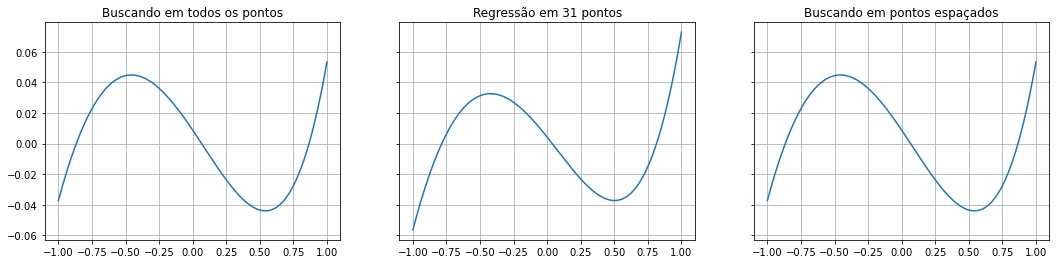

In [46]:
compara_erros(np.exp, -1, 1, 31, 2, 200)

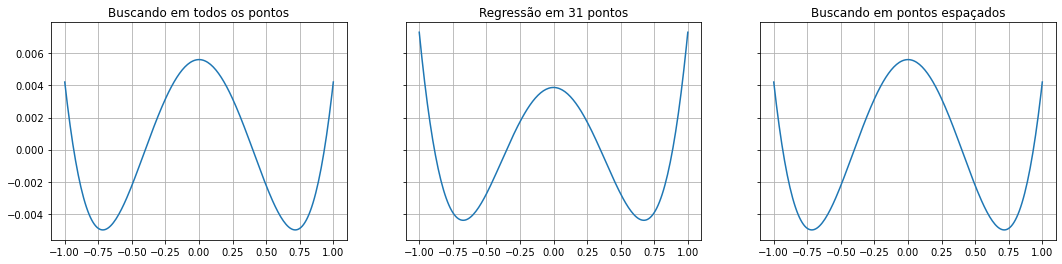

In [47]:
compara_erros(np.cos, -1, 1, 31, 2, 200)

O que você percebe nestes gráficos?

É possível notar que os gráficos dos erros tem a mesma "forma", apesar de com "amplitudes de erros" com valores diferentes pra cada ponto

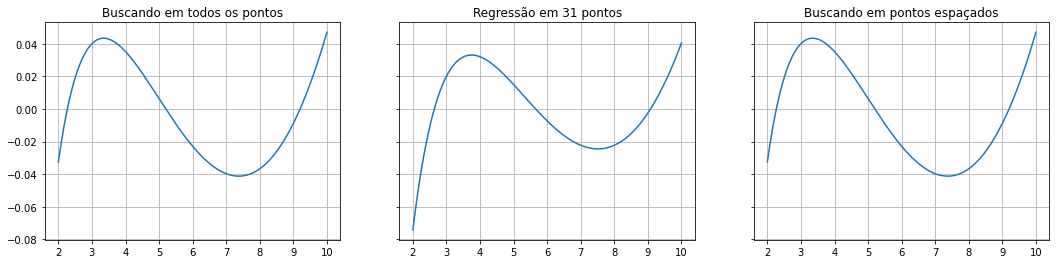

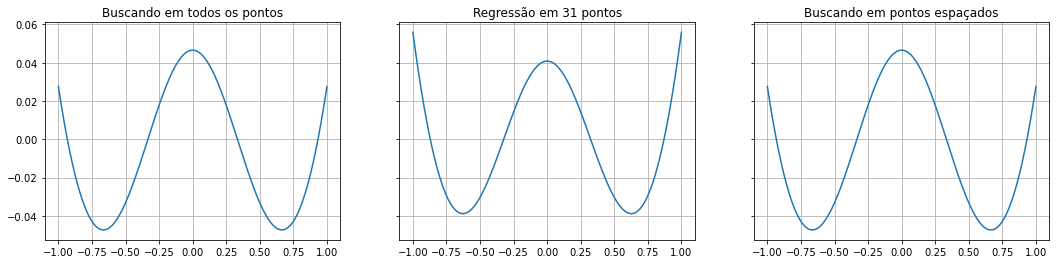

In [48]:
compara_erros(np.log, 2, 10, 31, 2, 200)
compara_erros(cauchy, -1, 1, 31, 2, 200)

Para estas funções, o que você observa de similar / diferente quanto às duas anteriores?

A similaridade principal se mostra no fato da ideia da "forma geral" ser mantida, mas pode-se ver que os valores de erros em certos pontos estão bem mais distantes, principalmente no log.

## Questão 8: Aumentando o grau

Vamos agora tentar achar polinômios de grau 4.
A caixa abaixo pode levar um certo tempo para rodar... (tente ficar abaixo de 1 min, mas não é o mais importante)

CPU times: user 7min 5s, sys: 2.78 s, total: 7min 8s
Wall time: 7min 10s


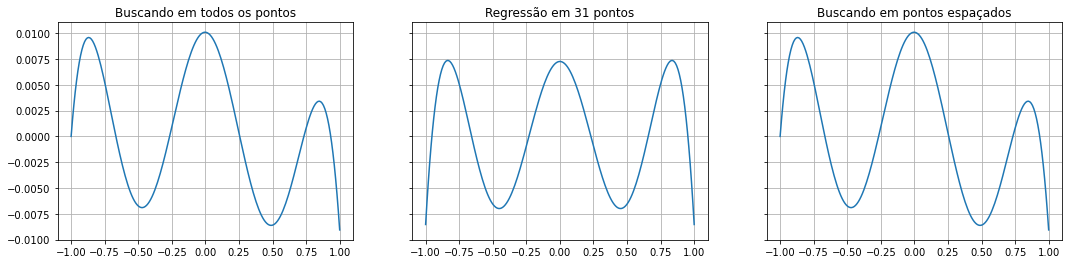

In [49]:
%time compara_erros(cauchy, -1, 1, 31, 4, 200)

O que você percebe de similar / diferente neste caso, com relação aos polinômios de grau 2?

Assim como no polinômio de grau 2, os erros se mostram seguir a mesma forma geral. Porém a forma do erro quando aplicado a ao grau 2 se difere ao grau 4. Por exemplo, no de grau 2 temos um total de 3 picos e vales, enquanto no grau 4 temos 5. O erro oscila bem mais.

Qual é a parte mais demorada de `compara_erros`?
Porquê?

É a parte de buscar em todas as combinações de pontos. São milhares de possibilidades de combinações, gerando um grande loop, com muitas operações em cada iteração

## Questão 9: Aumentando ainda mais o grau

Uma outra forma de calcular aproximações é usar o polinômio de Taylor.
Defina, abaixo, a função `exp_taylor` que calcula a aproximação da exponencial
pelo polinômio de Taylor:
$$ e^x \simeq 1 + x + \frac{x^2}{2} + \ldots + \frac{x^n}{n!}. $$

In [50]:
def exp_taylor(xs, deg):
    """Série de Taylor da exponencial, com grau  deg"""
    xs = np.asarray(xs, dtype=np.float)
    cur = np.ones_like(xs)
    soma = 0
    for i in range(deg+1):
        soma += xs**i/np.math.factorial(i)
    return soma

In [51]:
assert exp_taylor(1, 3) == 1 + 1 + 1/2 + 1/6

In [52]:
xs = [-1,1,0.6]
assert not np.allclose(exp_taylor(xs, 5), np.exp(xs))
assert np.allclose(exp_taylor(xs, 8), np.exp(xs))

Agora, faça um gráfico comparando os erros, no intervalo $[-1,1]$:
- do polinômio de Taylor de grau 5 para a exponencial
- do polinômio interpolador de grau 5
- do polinômio de grau 5 obtido por regressão em 100 pontos.

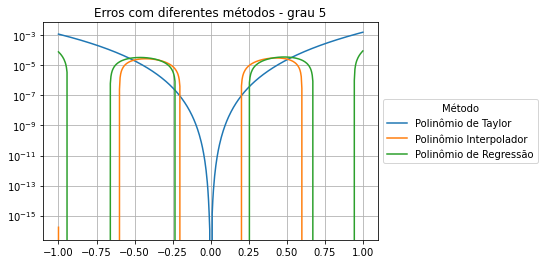

In [53]:
xs = np.linspace(-1,1,500)
xs2 = np.linspace(-1,1,6)
interpol = lagrange(xs2,np.exp(xs2))
reg = poly_reg(np.exp,-1,1,100,5)

plt.semilogy(xs, np.exp(xs)-exp_taylor(xs,5), label = 'Polinômio de Taylor')
plt.semilogy(xs, np.exp(xs)-interpol(xs), label = 'Polinômio Interpolador')
plt.semilogy(xs, np.exp(xs)-reg(xs), label = 'Polinômio de Regressão')


plt.legend(title="Método", bbox_to_anchor=(1, 0.5), loc="center left")
plt.grid()
plt.title('Erros com diferentes métodos - grau 5')
ax = plt.gca()

In [54]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.get_title() != ""

O que você observa quanto aos erros de cada método?

O erros para a aproximação com Taylor crescem rapidamente a partir do ponto x=0, tanto para a valores maiores quanto menores, de forma simétrica. Com a interpolação e a regressão, apesar de existir simetria em relação ao mesmo ponto, os comportamentos são diferentes. Há intervalos em que o erro é muito próximo de zero e outros em que este cresce até um valor relativamente alto. Também, a regressão acaba por cometer tal erro mais próximo dos extremos do intervalor, estando um pouco defasado em relação ao erro da interpolação. De fato, a forma com que o erro foi calculado na interpolação favorece os extremos.

Agora, faça para grau 10

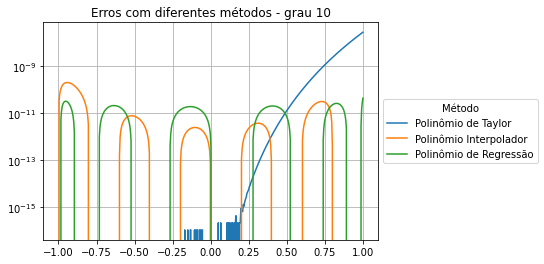

In [55]:
xs = np.linspace(-1,1,500)
xs2 = np.linspace(-1,1,11)
interpol = lagrange(xs2,np.exp(xs2))
reg = poly_reg(np.exp,-1,1,100,10)

plt.semilogy(xs, np.exp(xs)-exp_taylor(xs,10), label = 'Polinômio de Taylor')
plt.semilogy(xs, np.exp(xs)-interpol(xs), label = 'Polinômio Interpolador')
plt.semilogy(xs, np.exp(xs)-reg(xs), label = 'Polinômio de Regressão')


plt.legend(title="Método", bbox_to_anchor=(1, 0.5), loc="center left")
plt.grid()
plt.title('Erros com diferentes métodos - grau 10')
ax = plt.gca()

In [56]:
assert len(ax.lines) == 3
for l in ax.lines:
    ys = l.get_ydata()
    assert max(np.abs(ys)) < 1e-6

Comente.

Agora a simetria mencionada na questão anterior não aparece mais, o que está relacionado com o polinomio ter um grau par. Além disso, o polinômio de Taylor apresenta um comportamento estranho, crescendo muito em valores positivos. 

## Questão 10: Interpolando em um intervalo maior

Agora, faça para a função `cauchy`, no intervalo $[-4,4]$.
Como a série de Taylor (em zero) é simplesmente a "fórmula da PG":

$$ \text{cauchy}(x) = 1 - x^2 + x^4 - x^6 \ldots, $$

que não converge fora de $(-1,1)$,
faça apenas dos polinômios de grau 5 (e depois 10) por Lagrange uniforme e por regressão.

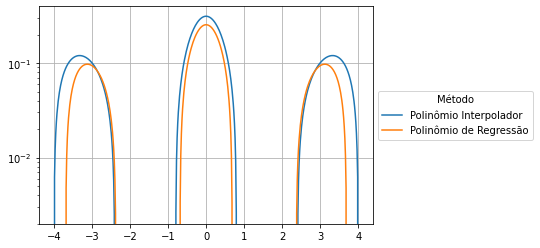

In [57]:
# Ajuste em grau 5
xs = np.linspace(-4,4,500)
xs2 = np.linspace(-4,4,6)
interpol = lagrange(xs2,cauchy(xs2))
reg = poly_reg(cauchy,-4,4,100,5)

plt.semilogy(xs, cauchy(xs)-interpol(xs), label = 'Polinômio Interpolador')
plt.semilogy(xs, cauchy(xs)-reg(xs), label = 'Polinômio de Regressão')

plt.legend(title="Método", bbox_to_anchor=(1, 0.5), loc="center left")
plt.grid()
ax = plt.gca()

In [58]:
assert len(ax.lines) == 2
for l in ax.lines:
    ys = l.get_ydata()
    assert max(np.abs(ys)) > 1e-1

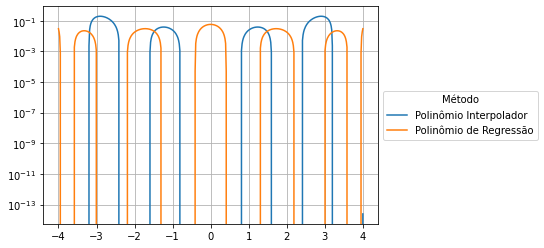

In [59]:
# Ajuste em grau 10
xs = np.linspace(-4,4,500)
xs2 = np.linspace(-4,4,11)
interpol = lagrange(xs2,cauchy(xs2))
reg = poly_reg(cauchy,-4,4,100,10)

plt.semilogy(xs, cauchy(xs)-interpol(xs), label = 'Polinômio Interpolador')
plt.semilogy(xs, cauchy(xs)-reg(xs), label = 'Polinômio de Regressão')

plt.legend(title="Método", bbox_to_anchor=(1, 0.5), loc="center left")
plt.grid()
ax = plt.gca()

In [60]:
assert len(ax.lines) == 2
for l in ax.lines:
    ys = l.get_ydata()
    assert max(np.abs(ys)) > 1e-2

O que você vê de diferente?

No caso com um grau menor, os erros eram mais parecidos, havia pouca diferença em seu comportamento e estava mais concentrada nos extremos do intervalo. Com um grau maior, contudo, vemos que o polinômio de regressão tem mais "picos" de erros, enquanto que o polinomio interpolador, apesar de ter menos "picos", comete erros maiores quanto mais se distanciamos do centro do intervalo. Também, vemos que foram atingidos valores maiores de erro na interpolação, mesmo com o aumento do grau dos polinomios.

Faça, agora, para polinômios de grau 20. 

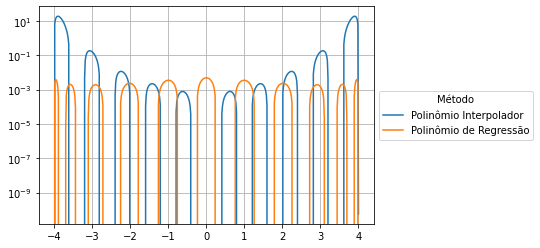

In [61]:
# Ajuste em grau 20
xs = np.linspace(-4,4,500)
xs2 = np.linspace(-4,4,21)
interpol = lagrange(xs2,cauchy(xs2))
reg = poly_reg(cauchy,-4,4,100,20)

plt.semilogy(xs, cauchy(xs)-interpol(xs), label = 'Polinômio Interpolador')
plt.semilogy(xs, cauchy(xs)-reg(xs), label = 'Polinômio de Regressão')

plt.legend(title="Método", bbox_to_anchor=(1, 0.5), loc="center left")
plt.grid()
ax = plt.gca()

Como o erro de ajuste evolui, ao aumentar $n$, para o método de Lagrange?
E para o método de regressão?

Seguindo a logica da questão anterior, notamos que na interpolação os erros crescem quando se distancia do centro do intervalo, chegando em valores até maiores do que aqueles atingidos com um polinomio de grau menor. Para a regressão, porém, o comportamento é diferente no sentido que o erro acaba sendo menor com o aumento de n e, além disso, seu valor não varia tanto quando se está mais distante do centro.